Every implementation of machine learning algorithms has the same basic components. These same principles will be used in this project, viz;
- Data collection, that is defining the problem and assembling a dataset
- Data preparation
- Choose model
- Create the model
- Train model, that is developing a model that does better than a baseline
- Evaluate model, that is choosing a measure of success and deciding on an evaluation protocol
- Parameter tuning, that is regularizing the model and tuning the parameters
- Prediction

# Data Collection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
%matplotlib inline
import seaborn as sns
from scipy import stats as ss
from scipy.stats import norm
import re
import warnings;warnings.filterwarnings("ignore")

In [2]:
xdata=pd.read_csv("Tent.csv")

In [3]:
xdata.columns = ["Applied", "Gender", "Payment_Method","Area",
               "Received", "Id", "Reason", "Date", "Age", "Location","True_False"]

In [4]:
xdata.head()

Applied Gender Payment_Method Area   Received            Id Reason  \
0    $330.00      F             AV    S    $330.00  GHI001639172     TB   
1  $1,300.00      M             AV    S  $1,300.00  GHI000270611     TB   
2  $1,400.00      F             AV   BP  $1,400.00  GHI000761091     TB   
3  $1,400.00      F             AV   BP  $1,400.00  GHI000761091     TB   
4  $1,100.00      F             AV   BP  $1,100.00  GHI000761091     TB   

        Date    Age Location  True_False  
0  26-Nov-18  18-19       NE           0  
1  14-Jul-17  30-34        O           0  
2  07-Aug-19  30-34       NE           0  
3  12-Aug-19  35-39        M           0  
4  21-Nov-19  40-44        M           0

## Separating a Test Dataset and Training Dataset

#### Reason to separate:
Now we will use "data" as the training data as a whole, machine will not know about "xdata". "Xdata" will be used as a alien dataset to which the computer will predict, later we will use it to check the accuracy. It has been done to check how our model will work on real world.

In [7]:
X,Y=xdata[['Applied', 'Gender', 'Payment_Method', 'Location', 'Received', 'Id',
       'Reason', 'Date', 'Age', 'Area']],xdata[['True_False']]

In [8]:
from sklearn.model_selection import train_test_split
traindata, testdata, targetdata, testtargetdata = train_test_split(X, Y, stratify = Y, test_size=0.20, random_state=0)

In [9]:
traindata.head()

Applied Gender Payment_Method Location Received            Id Reason  \
58160   $134.00      F             AV        M  $134.00  GHI000112669     TB   
115620  $800.00      F             RP       NE  $800.00  GHI000780038     TB   
98246   $270.00      M             AV        M  $270.00  GHI000437510     TB   
143469  $600.00      M             AV        M  $600.00  GHI000140582     TB   
118680  $270.00      F             AV        M  $270.00  GHI001420547     TB   

             Date    Age Area  
58160   25-Jun-18  40-44    O  
115620  30-Nov-18  18-19  Wlg  
98246   05-Mar-19  35-39   AM  
143469  31-Jan-19  55-59    C  
118680  09-Sep-20  30-34    C

In [10]:
traindata['Reason'].value_counts()

TB    117405
Name: Reason, dtype: int64

In [11]:
targetdata['True_False'].value_counts()

0    117071
1       334
Name: True_False, dtype: int64

In [12]:
testdata['Reason'].value_counts()

TB    29352
Name: Reason, dtype: int64

In [13]:
testtargetdata['True_False'].value_counts()

0    29269
1       83
Name: True_False, dtype: int64

In [14]:
frame=[traindata,targetdata]
data=pd.concat(frame,axis=1)
data

Applied Gender Payment_Method Location   Received            Id  \
58160     $134.00      F             AV        M    $134.00  GHI000112669   
115620    $800.00      F             RP       NE    $800.00  GHI000780038   
98246     $270.00      M             AV        M    $270.00  GHI000437510   
143469    $600.00      M             AV        M    $600.00  GHI000140582   
118680    $270.00      F             AV        M    $270.00  GHI001420547   
...           ...    ...            ...      ...        ...           ...   
92116   $1,050.00      F             AV       NE  $1,050.00  GHI000263441   
83214     $680.00      M             RP        M    $680.00  GHI000142341   
141432    $630.00      M             AV       NE    $630.00  GHI000099606   
6384      $216.00      M             AV        M    $216.00  GHI000135471   
28606     $340.00      F             AV       NE    $340.00  GHI001140992   

       Reason       Date    Age Area  True_False  
58160      TB  25-Jun-18  40-44    O           0  
115620     TB  30-Nov-18  18-19  Wlg           0  
98246      TB  05-Mar-19  35-39   AM           0  
143469     TB  31-Jan-19  55-59    C           0  
118680     TB  09-Sep-20  30-34    C           0  
...       ...        ...    ...  ...         ...  
92116      TB  06-Mar-17  45-49   BP           0  
83214      TB  28-Aug-17  25-29    C           0  
141432     TB  28-Jun-17  45-49  Wlg           0  
6384       TB  22-Nov-19  45-49    O           0  
28606      TB  05-May-17    65+    C           0  

[117405 rows x 11 columns]

In [15]:
frame=[testdata,testtargetdata]
datax=pd.concat(frame,axis=1)
datax

Applied Gender Payment_Method Location   Received            Id  \
120628  $1,760.00      F             AV       NE  $1,760.00  GHI000081283   
73316   $1,360.00      M             RP        M  $1,360.00  GHI000402974   
108895  $1,200.00      M             RP       NE  $1,200.00  GHI000085542   
41066   $3,100.00      F             AV        M  $3,100.00  GHI001497095   
62592     $460.00      F             AV        M    $460.00  GHI000358933   
...           ...    ...            ...      ...        ...           ...   
145390    $660.00      M             AV        M    $660.00  GHI001255684   
96069   $1,360.00      F             AV        M  $1,360.00  GHI000134418   
99535     $700.00      F             RP       NE    $700.00  GHI001743643   
49365     $208.00      F             AV        M    $208.00  GHI000112669   
30923   $1,290.00      F             AV       NE  $1,290.00  GHI000941326   

       Reason       Date    Age Area  True_False  
120628     TB  19-Sep-19  35-39   BP           0  
73316      TB  05-Jun-19  35-39   BP           0  
108895     TB  28-Nov-18  20-24    C           0  
41066      TB  18-Sep-18  30-34   BP           0  
62592      TB  05-Nov-18  45-49   AM           0  
...       ...        ...    ...  ...         ...  
145390     TB  12-Dec-17  35-39   AM           0  
96069      TB  20-Feb-18  35-39   EC           0  
99535      TB  20-Jun-19  40-44    C           0  
49365      TB  06-Jan-17  25-29    O           0  
30923      TB  15-May-19  45-49   AM           0  

[29352 rows x 11 columns]

In [16]:
datax.to_csv("Tenancy_Bond_Testset.csv")

In [17]:
data.to_csv("Tenancy_Bond_Trainingset.csv")

# Data Preparation and Feature Engineering
## Adding and Cleaning columns
##### Removing special characters and converting to continous values 

In [18]:
data=pd.read_csv("Tenancy_Bond_Trainingset.csv")

In [19]:
data=data.drop("Unnamed: 0",axis=1)

In [20]:
data.tail()

Applied Gender Payment_Method Location   Received            Id  \
117400  $1,050.00      F             AV       NE  $1,050.00  GHI000263441   
117401    $680.00      M             RP        M    $680.00  GHI000142341   
117402    $630.00      M             AV       NE    $630.00  GHI000099606   
117403    $216.00      M             AV        M    $216.00  GHI000135471   
117404    $340.00      F             AV       NE    $340.00  GHI001140992   

       Reason       Date    Age Area  True_False  
117400     TB  06-Mar-17  45-49   BP           0  
117401     TB  28-Aug-17  25-29    C           0  
117402     TB  28-Jun-17  45-49  Wlg           0  
117403     TB  22-Nov-19  45-49    O           0  
117404     TB  05-May-17    65+    C           0

In [21]:
data['Applied']=data['Applied'].replace(r'',np.NaN)
data.dropna()
data['Applied']=data['Applied'].replace('[A-Z a-z , / ? \ : " ; $]','' ,regex=True)
data['Applied']=data['Applied'].astype(float)

data['Received']=data['Received'].replace(r'',np.NaN)
data.dropna()

data['Received']=data['Received'].replace('[A-Z a-z , / ? \ : " ; $]','' ,regex=True)
data['Received']=data['Received'].astype(float)

In [22]:
data['Payment_Method'].value_counts()

AV    100828
RP     16576
U          1
Name: Payment_Method, dtype: int64

In [23]:
data["Age"].unique()

array(['40-44', '18-19', '35-39', '55-59', '30-34', '25-29', '45-49',
       '20-24', '65+', '50-54', '60-64', '17', '16'], dtype=object)

In [24]:
mapper = {"16" : "Teenage", "17" : "Teenage", "18-19" : "Adult", "20-24": "Adult",
          "25-29" : "Adult", "30-34" : "MidAge", "35-39" : "MidAge", "40-44" : "MidAge",
          "45-49" : "MidAge", "50-54" : "Old", "55-59" : "Old", "60-64" : "Old", "65+":"Old"}
#Decrease number of age groups as it may decrease our accuracy in classification model.

In [25]:
data["AgeGroup"] = data["Age"].map(mapper)

In [26]:
pmapper = {"AV":"AV","RP":"RPU", "U":"RPU"}

In [27]:
data["Payment_Type"] = data["Payment_Method"].map(pmapper)

In [28]:
data["logapplied"] = pd.Series(np.log(data["Applied"]), index = data.index)
data["logreceived"] = pd.Series(np.log(data["Received"]), index = data.index)

In [29]:
data["Ratio"] = data["Received"]/data["Applied"]

In [30]:
'''
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Year'] = pd.DatetimeIndex(data['Date']).year
data['Month'] = pd.DatetimeIndex(data['Date']).month
data['Day']= pd.DatetimeIndex(data['Date']).day
data['Week_Of_Month']= data['Date'].apply(lambda d: (d.day-1)//7+1)
data['Week_Of_Year']= pd.DatetimeIndex(data['Date']).weekofyear
'''

"\ndata['Date'] = pd.to_datetime(data['Date'], errors='coerce')\ndata['Year'] = pd.DatetimeIndex(data['Date']).year\ndata['Month'] = pd.DatetimeIndex(data['Date']).month\ndata['Day']= pd.DatetimeIndex(data['Date']).day\ndata['Week_Of_Month']= data['Date'].apply(lambda d: (d.day-1)//7+1)\ndata['Week_Of_Year']= pd.DatetimeIndex(data['Date']).weekofyear\n"

In [31]:
def add_datepart(df, fldname, drop=True):
    fld = df[fldname]
    if not np.issubdtype(fld.dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    for n in ('Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start'):
        df[targ_pre+n] = getattr(fld.dt,n.lower())
    df[targ_pre+'Elapsed'] = fld.astype(np.int64) // 10**9
    if drop: df.drop(fldname, axis=1, inplace=True)

## Checking details of dataset
#### Preliminary Data Analysis

In [32]:
data.head()

Applied Gender Payment_Method Location  Received            Id Reason  \
0    134.0      F             AV        M     134.0  GHI000112669     TB   
1    800.0      F             RP       NE     800.0  GHI000780038     TB   
2    270.0      M             AV        M     270.0  GHI000437510     TB   
3    600.0      M             AV        M     600.0  GHI000140582     TB   
4    270.0      F             AV        M     270.0  GHI001420547     TB   

        Date    Age Area  True_False AgeGroup Payment_Type  logapplied  \
0  25-Jun-18  40-44    O           0   MidAge           AV    4.897840   
1  30-Nov-18  18-19  Wlg           0    Adult          RPU    6.684612   
2  05-Mar-19  35-39   AM           0   MidAge           AV    5.598422   
3  31-Jan-19  55-59    C           0      Old           AV    6.396930   
4  09-Sep-20  30-34    C           0   MidAge           AV    5.598422   

   logreceived  Ratio  
0     4.897840    1.0  
1     6.684612    1.0  
2     5.598422    1.0  
3     6.396930    1.0  
4     5.598422    1.0

In [33]:
add_datepart(data, "Date")

In [34]:
data.isnull().sum() #checking if there is any null column

Applied             0
Gender              0
Payment_Method      0
Location            0
Received            0
Id                  0
Reason              0
Age                 0
Area                0
True_False          0
AgeGroup            0
Payment_Type        0
logapplied          0
logreceived         0
Ratio               0
Year                0
Month               0
Week                0
Day                 0
Dayofweek           0
Dayofyear           0
Is_month_end        0
Is_month_start      0
Is_quarter_end      0
Is_quarter_start    0
Is_year_end         0
Is_year_start       0
Elapsed             0
dtype: int64

In [35]:
data.info() #details about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117405 entries, 0 to 117404
Data columns (total 28 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Applied           117405 non-null  float64
 1   Gender            117405 non-null  object 
 2   Payment_Method    117405 non-null  object 
 3   Location          117405 non-null  object 
 4   Received          117405 non-null  float64
 5   Id                117405 non-null  object 
 6   Reason            117405 non-null  object 
 7   Age               117405 non-null  object 
 8   Area              117405 non-null  object 
 9   True_False        117405 non-null  int64  
 10  AgeGroup          117405 non-null  object 
 11  Payment_Type      117405 non-null  object 
 12  logapplied        117405 non-null  float64
 13  logreceived       117405 non-null  float64
 14  Ratio             117405 non-null  float64
 15  Year              117405 non-null  int64  
 16  Month             11

In [36]:
data.describe()

Applied       Received     True_False     logapplied  \
count  117405.000000  117405.000000  117405.000000  117405.000000   
mean      920.518291     920.513551       0.002845       6.520006   
std       645.393064     645.390510       0.053261       0.859966   
min         1.000000       1.000000       0.000000       0.000000   
25%       360.000000     360.000000       0.000000       5.886104   
50%       800.000000     800.000000       0.000000       6.684612   
75%      1350.000000    1350.000000       0.000000       7.207860   
max     21060.000000   21060.000000       1.000000       9.955131   

         logreceived          Ratio           Year          Month  \
count  117405.000000  117405.000000  117405.000000  117405.000000   
mean        6.519995       0.999989    2018.420655       6.637912   
std         0.859999       0.000929       1.149738       3.401530   
min         0.000000       0.833333    2016.000000       1.000000   
25%         5.886104       1.000000    2017.000000       4.000000   
50%         6.684612       1.000000    2018.000000       7.000000   
75%         7.207860       1.000000    2019.000000      10.000000   
max         9.955131       1.060000    2020.000000      12.000000   

                Week            Day      Dayofweek      Dayofyear  \
count  117405.000000  117405.000000  117405.000000  117405.000000   
mean       27.190580      15.834956       2.104731     186.733120   
std        14.784314       8.663838       1.425295     103.574056   
min         1.000000       1.000000       0.000000       3.000000   
25%        14.000000       8.000000       1.000000      95.000000   
50%        28.000000      16.000000       2.000000     190.000000   
75%        40.000000      23.000000       3.000000     275.000000   
max        52.000000      31.000000       6.000000     365.000000   

            Elapsed  
count  1.174050e+05  
mean   1.544076e+09  
std    3.665378e+07  
min    1.480550e+09  
25%    1.512346e+09  
50%    1.543536e+09  
75%    1.574986e+09  
max    1.606694e+09

#### From Preliminary Data Analysis we can se there is no null value so there is no need to impute values
#### But we found there is a huge difference in standard deviation and median, also difference between 25%, 50%, 75% percentile is also large, so it seems Outliers can be present in the data.

In [37]:
#Printing some outliers
data[(data.Applied>np.percentile(data.Applied,[99])[0])]

Applied Gender Payment_Method Location  Received            Id Reason  \
17       2768.0      F             AV        M   2767.50  GHI000429326     TB   
48       2921.0      F             AV       PP   2921.25  GHI001392649     TB   
52       2800.0      M             AV       NE   2800.00  GHI001681430     TB   
147      2829.0      F             AV       NE   2829.00  GHI000076638     TB   
180      2800.0      F             AV        M   2800.00  GHI000465936     TB   
...         ...    ...            ...      ...       ...           ...    ...   
117098   2950.0      F             RP       PP   2950.00  GHI000136453     TB   
117229   3383.0      F             AV       PP   3382.50  GHI000149254     TB   
117309   2880.0      F             AV        M   2880.00  GHI001126147     TB   
117317   3040.0      F             AV        M   3040.00  GHI001340167     TB   
117363   2970.0      M             AV        M   2970.00  GHI001064704     TB   

          Age Area  True_False  ... Day Dayofweek  Dayofyear  Is_month_end  \
17      25-29  Wlg           0  ...  11         1        345         False   
48      20-24   AM           0  ...  23         3        235         False   
52      40-44   AM           0  ...  17         1         77         False   
147     20-24   AM           0  ...  22         2         81         False   
180     30-34   AM           0  ...   2         1         92         False   
...       ...  ...         ...  ...  ..       ...        ...           ...   
117098  25-29    O           0  ...  16         0        259         False   
117229  35-39   AM           0  ...  25         3        145         False   
117309  30-34   AM           0  ...   6         0        218         False   
117317  45-49   AM           0  ...   4         0        308         False   
117363  25-29    O           0  ...  24         3        268         False   

        Is_month_start  Is_quarter_end  Is_quarter_start  Is_year_end  \
17               False           False             False        False   
48               False           False             False        False   
52               False           False             False        False   
147              False           False             False        False   
180              False           False             False        False   
...                ...             ...               ...          ...   
117098           False           False             False        False   
117229           False           False             False        False   
117309           False           False             False        False   
117317           False           False             False        False   
117363           False           False             False        False   

        Is_year_start     Elapsed  
17              False  1544486400  
48              False  1534982400  
52              False  1584403200  
147             False  1490140800  
180             False  1554163200  
...               ...         ...  
117098          False  1568592000  
117229          False  1495670400  
117309          False  1533513600  
117317          False  1572825600  
117363          False  1600905600  

[1175 rows x 28 columns]

In [39]:
#saving the outliers in a excel file to check the outliers
data[(data.Applied>np.percentile(data.Applied,[99])[0])].to_excel("outliers_tent.xlsx")

#### Conclusion: From Preliminary data analysis we found most of the outliers weren't fraud. So it is dificult to find a thresold value of being fraud.

# Exploratory Data Analysis

## Pandas Profiling

In [40]:
from pandas_profiling import ProfileReport

In [41]:
profile = ProfileReport(data, title="Pandas Profiling Report")

In [42]:
profile.to_file("Profiling_report.html") #Saving the report in a html file

In [43]:
profile 

### Checking Correlation using Cramer's V rule
Checking correletion of each columns with the target columns
and also checking correlation of with each other

In [44]:
def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [45]:
lst=[]
lst.clear()

In [46]:
cols = list(data.columns)

In [47]:
cols.remove("True_False")

In [48]:
print(cols)
for col in cols:
    confusion_matrix = pd.crosstab(data[col], data['True_False']).to_numpy()
    lst.append(cramers_v(confusion_matrix)*100)
    print(cramers_v(confusion_matrix)*100)

['Applied', 'Gender', 'Payment_Method', 'Location', 'Received', 'Id', 'Reason', 'Age', 'Area', 'AgeGroup', 'Payment_Type', 'logapplied', 'logreceived', 'Ratio', 'Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Elapsed']
16.369808128693393
0.5172637605554556
0.7771222304882588
2.628814376370071
20.37379535799862
90.04332085353764
nan
1.4884936481324653
6.4852513046381555
1.1167684246043692
0.8056854410874628
16.369808128693393
20.37379535799862
18.52361462346488
2.483576095622114
1.3383004121899598
1.2883808660597353
0.9792348288767827
0.4693414365227082
2.6399279086325533
0.0
0.0
0.0
0.0
0.0
nan
3.6373010620887167


In [49]:
#split the cells below if you want to get values of each column separately
'''
confusion_matrix = pd.crosstab(data['Gender'], data['True_False']).to_numpy()
cramers_v(confusion_matrix)*100
#Gender cannot be used in our model, though gender is 4.82% is correlated with our target, as our model can be gender biased and it also least import column

confusion_matrix = pd.crosstab(data['Payment_Method'], data['True_False']).to_numpy()
lst.append(cramers_v(confusion_matrix)*100)
cramers_v(confusion_matrix)*100

confusion_matrix = pd.crosstab(data['Area'], data['True_False']).to_numpy()
lst.append(cramers_v(confusion_matrix)*100)
cramers_v(confusion_matrix)*100

confusion_matrix = pd.crosstab(data['Received'], data['True_False']).to_numpy()
lst.append(cramers_v(confusion_matrix)*100)
cramers_v(confusion_matrix)*100

confusion_matrix = pd.crosstab(data['Id'], data['True_False']).to_numpy()
cramers_v(confusion_matrix)*100
#It is because if a person is declared as fraud his/her all transaction are marked as fraud. So "Id" is not needed in our trainning model.

confusion_matrix = pd.crosstab(data['Reason'], data['True_False']).to_numpy()
lst.append(cramers_v(confusion_matrix)*100)
cramers_v(confusion_matrix)*100

confusion_matrix = pd.crosstab(data['Age'], data['True_False']).to_numpy()
lst.append(cramers_v(confusion_matrix)*100)
cramers_v(confusion_matrix)*100

confusion_matrix = pd.crosstab(data['Location'], data['True_False']).to_numpy()
lst.append(cramers_v(confusion_matrix)*100)
cramers_v(confusion_matrix)*100

confusion_matrix = pd.crosstab(data['Date'], data['True_False']).to_numpy()
lst.append(cramers_v(confusion_matrix)*100)
cramers_v(confusion_matrix)*100

confusion_matrix = pd.crosstab(data['Year'], data['True_False']).to_numpy()
lst.append(cramers_v(confusion_matrix)*100)
cramers_v(confusion_matrix)*100

confusion_matrix = pd.crosstab(data['Month'], data['True_False']).to_numpy()
lst.append(cramers_v(confusion_matrix)*100)
cramers_v(confusion_matrix)*100

confusion_matrix = pd.crosstab(data['Day'], data['True_False']).to_numpy()
lst.append(cramers_v(confusion_matrix)*100)
cramers_v(confusion_matrix)*100

confusion_matrix = pd.crosstab(data['Week_Of_Month'], data['True_False']).to_numpy()
lst.append(cramers_v(confusion_matrix)*100)
cramers_v(confusion_matrix)*100

confusion_matrix = pd.crosstab(data['Week_Of_Year'], data['True_False']).to_numpy()
lst.append(cramers_v(confusion_matrix)*100)
cramers_v(confusion_matrix)*100
'''

'\nconfusion_matrix = pd.crosstab(data[\'Gender\'], data[\'True_False\']).to_numpy()\ncramers_v(confusion_matrix)*100\n#Gender cannot be used in our model, though gender is 4.82% is correlated with our target, as our model can be gender biased and it also least import column\n\nconfusion_matrix = pd.crosstab(data[\'Payment_Method\'], data[\'True_False\']).to_numpy()\nlst.append(cramers_v(confusion_matrix)*100)\ncramers_v(confusion_matrix)*100\n\nconfusion_matrix = pd.crosstab(data[\'Area\'], data[\'True_False\']).to_numpy()\nlst.append(cramers_v(confusion_matrix)*100)\ncramers_v(confusion_matrix)*100\n\nconfusion_matrix = pd.crosstab(data[\'Received\'], data[\'True_False\']).to_numpy()\nlst.append(cramers_v(confusion_matrix)*100)\ncramers_v(confusion_matrix)*100\n\nconfusion_matrix = pd.crosstab(data[\'Id\'], data[\'True_False\']).to_numpy()\ncramers_v(confusion_matrix)*100\n#It is because if a person is declared as fraud his/her all transaction are marked as fraud. So "Id" is not need

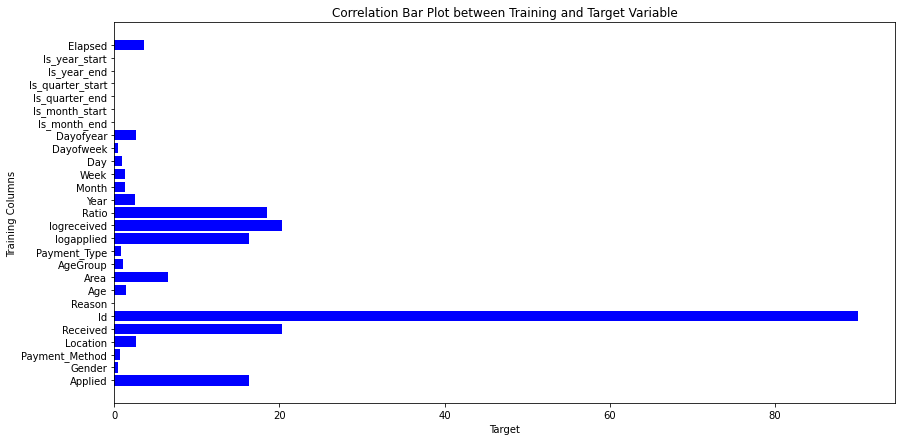

In [50]:
fig=pl.figure(figsize=(14,7))
pl.barh(cols,lst,color='b')
pl.ylabel("Training Columns")
pl.xlabel("Target")
pl.title("Correlation Bar Plot between Training and Target Variable")
pl.show()

### Correlation plot of each column with each other
##### The image has been cropped and import from the pandas profiling

In [51]:
from IPython.display import Image
Image(filename="Cramer'sV.PNG")

FileNotFoundError: [Errno 2] No such file or directory: "Cramer'sV.PNG"

#### Checking Bias in target data

In [52]:
data['True_False'].value_counts()

0    117071
1       334
Name: True_False, dtype: int64

In [53]:
data1=data.copy()

In [54]:
#del data1['Date']
del data1['Gender']
del data1['Id']
del data1['Applied']
del data1['Received']
del data1['Age']
del data1['Reason']
del data1['Payment_Method']
## Removed highly correlated KPIS
#del data1["Week_Of_Month"]
#del data1["Week_Of_Year"]
del data1['logreceived']
del data1['Ratio']
del data1['Dayofweek']
#del data1['Dayofyear']
del data1['Is_month_end']
del data1['Is_month_start']
del data1['Is_quarter_end']
del data1['Is_quarter_start']
del data1['Is_year_end']
del data1['Is_year_start']

### Getting dummy variables

In [55]:
dataf=data1.copy()

In [56]:
data1

Location Area  True_False AgeGroup Payment_Type  logapplied  Year  \
0             M    O           0   MidAge           AV    4.897840  2018   
1            NE  Wlg           0    Adult          RPU    6.684612  2018   
2             M   AM           0   MidAge           AV    5.598422  2019   
3             M    C           0      Old           AV    6.396930  2019   
4             M    C           0   MidAge           AV    5.598422  2020   
...         ...  ...         ...      ...          ...         ...   ...   
117400       NE   BP           0   MidAge           AV    6.956545  2017   
117401        M    C           0    Adult          RPU    6.522093  2017   
117402       NE  Wlg           0   MidAge           AV    6.445720  2017   
117403        M    O           0   MidAge           AV    5.375278  2019   
117404       NE    C           0      Old           AV    5.828946  2017   

        Month  Week  Day  Dayofyear     Elapsed  
0           6    26   25        176  1529884800  
1          11    48   30        334  1543536000  
2           3    10    5         64  1551744000  
3           1     5   31         31  1548892800  
4           9    37    9        253  1599609600  
...       ...   ...  ...        ...         ...  
117400      3    10    6         65  1488758400  
117401      8    35   28        240  1503878400  
117402      6    26   28        179  1498608000  
117403     11    47   22        326  1574380800  
117404      5    18    5        125  1493942400  

[117405 rows x 12 columns]

In [57]:
data1["Location"].unique()

array(['M', 'NE', 'PP', 'O', 'U'], dtype=object)

In [58]:
dataf=pd.get_dummies(dataf,drop_first=True)

In [59]:
dataf

True_False  logapplied  Year  Month  Week  Day  Dayofyear     Elapsed  \
0                0    4.897840  2018      6    26   25        176  1529884800   
1                0    6.684612  2018     11    48   30        334  1543536000   
2                0    5.598422  2019      3    10    5         64  1551744000   
3                0    6.396930  2019      1     5   31         31  1548892800   
4                0    5.598422  2020      9    37    9        253  1599609600   
...            ...         ...   ...    ...   ...  ...        ...         ...   
117400           0    6.956545  2017      3    10    6         65  1488758400   
117401           0    6.522093  2017      8    35   28        240  1503878400   
117402           0    6.445720  2017      6    26   28        179  1498608000   
117403           0    5.375278  2019     11    47   22        326  1574380800   
117404           0    5.828946  2017      5    18    5        125  1493942400   

        Location_NE  Location_O  ...  Area_NL  Area_O  Area_S  Area_T  Area_W  \
0                 0           0  ...        0       1       0       0       0   
1                 1           0  ...        0       0       0       0       0   
2                 0           0  ...        0       0       0       0       0   
3                 0           0  ...        0       0       0       0       0   
4                 0           0  ...        0       0       0       0       0   
...             ...         ...  ...      ...     ...     ...     ...     ...   
117400            1           0  ...        0       0       0       0       0   
117401            0           0  ...        0       0       0       0       0   
117402            1           0  ...        0       0       0       0       0   
117403            0           0  ...        0       1       0       0       0   
117404            1           0  ...        0       0       0       0       0   

        Area_Wlg  AgeGroup_MidAge  AgeGroup_Old  AgeGroup_Teenage  \
0              0                1             0                 0   
1              1                0             0                 0   
2              0                1             0                 0   
3              0                0             1                 0   
4              0                1             0                 0   
...          ...              ...           ...               ...   
117400         0                1             0                 0   
117401         0                0             0                 0   
117402         1                1             0                 0   
117403         0                1             0                 0   
117404         0                0             1                 0   

        Payment_Type_RPU  
0                      0  
1                      1  
2                      0  
3                      0  
4                      0  
...                  ...  
117400                 0  
117401                 1  
117402                 0  
117403                 0  
117404                 0  

[117405 rows x 26 columns]

# Creating the model

## Test Train Split

In [60]:
dataf.columns

Index(['True_False', 'logapplied', 'Year', 'Month', 'Week', 'Day', 'Dayofyear',
       'Elapsed', 'Location_NE', 'Location_O', 'Location_PP', 'Location_U',
       'Area_BP', 'Area_C', 'Area_EC', 'Area_N', 'Area_NL', 'Area_O', 'Area_S',
       'Area_T', 'Area_W', 'Area_Wlg', 'AgeGroup_MidAge', 'AgeGroup_Old',
       'AgeGroup_Teenage', 'Payment_Type_RPU'],
      dtype='object')

In [61]:
X1, y1 = dataf.drop(["True_False"],axis =1),dataf[['True_False']]

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, stratify = y1, test_size=0.20, random_state=0)

In [63]:
X1

logapplied  Year  Month  Week  Day  Dayofyear     Elapsed  \
0         4.897840  2018      6    26   25        176  1529884800   
1         6.684612  2018     11    48   30        334  1543536000   
2         5.598422  2019      3    10    5         64  1551744000   
3         6.396930  2019      1     5   31         31  1548892800   
4         5.598422  2020      9    37    9        253  1599609600   
...            ...   ...    ...   ...  ...        ...         ...   
117400    6.956545  2017      3    10    6         65  1488758400   
117401    6.522093  2017      8    35   28        240  1503878400   
117402    6.445720  2017      6    26   28        179  1498608000   
117403    5.375278  2019     11    47   22        326  1574380800   
117404    5.828946  2017      5    18    5        125  1493942400   

        Location_NE  Location_O  Location_PP  ...  Area_NL  Area_O  Area_S  \
0                 0           0            0  ...        0       1       0   
1                 1           0            0  ...        0       0       0   
2                 0           0            0  ...        0       0       0   
3                 0           0            0  ...        0       0       0   
4                 0           0            0  ...        0       0       0   
...             ...         ...          ...  ...      ...     ...     ...   
117400            1           0            0  ...        0       0       0   
117401            0           0            0  ...        0       0       0   
117402            1           0            0  ...        0       0       0   
117403            0           0            0  ...        0       1       0   
117404            1           0            0  ...        0       0       0   

        Area_T  Area_W  Area_Wlg  AgeGroup_MidAge  AgeGroup_Old  \
0            0       0         0                1             0   
1            0       0         1                0             0   
2            0       0         0                1             0   
3            0       0         0                0             1   
4            0       0         0                1             0   
...        ...     ...       ...              ...           ...   
117400       0       0         0                1             0   
117401       0       0         0                0             0   
117402       0       0         1                1             0   
117403       0       0         0                1             0   
117404       0       0         0                0             1   

        AgeGroup_Teenage  Payment_Type_RPU  
0                      0                 0  
1                      0                 1  
2                      0                 0  
3                      0                 0  
4                      0                 0  
...                  ...               ...  
117400                 0                 0  
117401                 0                 1  
117402                 0                 0  
117403                 0                 0  
117404                 0                 0  

[117405 rows x 25 columns]

In [64]:
X1.columns

Index(['logapplied', 'Year', 'Month', 'Week', 'Day', 'Dayofyear', 'Elapsed',
       'Location_NE', 'Location_O', 'Location_PP', 'Location_U', 'Area_BP',
       'Area_C', 'Area_EC', 'Area_N', 'Area_NL', 'Area_O', 'Area_S', 'Area_T',
       'Area_W', 'Area_Wlg', 'AgeGroup_MidAge', 'AgeGroup_Old',
       'AgeGroup_Teenage', 'Payment_Type_RPU'],
      dtype='object')

In [65]:
from sklearn .preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [66]:
import pickle
filename = 'scaler1.sav'
pickle.dump(sc, open(filename, 'wb'))

## Smote
###### Since there is a high difference in data we have to balance the dataset using smote

In [67]:
import imblearn
print(imblearn.__version__)
from imblearn.over_sampling import SMOTE

0.8.0


In [68]:
dataf.columns

Index(['True_False', 'logapplied', 'Year', 'Month', 'Week', 'Day', 'Dayofyear',
       'Elapsed', 'Location_NE', 'Location_O', 'Location_PP', 'Location_U',
       'Area_BP', 'Area_C', 'Area_EC', 'Area_N', 'Area_NL', 'Area_O', 'Area_S',
       'Area_T', 'Area_W', 'Area_Wlg', 'AgeGroup_MidAge', 'AgeGroup_Old',
       'AgeGroup_Teenage', 'Payment_Type_RPU'],
      dtype='object')

In [69]:
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train,y_train)

In [70]:
type(X_train)

numpy.ndarray

In [71]:
y_train['True_False'].value_counts()

1    93657
0    93657
Name: True_False, dtype: int64

In [72]:
y_test['True_False'].value_counts()

0    23414
1       67
Name: True_False, dtype: int64

# Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train, y_train)

In [74]:
y_pred=clf.predict(X_test)

In [75]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      0.76      0.86     23414
     class 1       0.01      0.81      0.02        67

    accuracy                           0.76     23481
   macro avg       0.50      0.78      0.44     23481
weighted avg       1.00      0.76      0.86     23481



In [76]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[17735  5679]
 [   13    54]]


0.7575912439844981

#### After Parameter Tuning using Grid Search CV

In [77]:
from sklearn.model_selection import GridSearchCV
grid_values = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}

lr = LogisticRegression(random_state = 5,max_iter=2000,solver='lbfgs',class_weight={0:1, 1:10})
classifier=GridSearchCV(lr,grid_values,cv=10,n_jobs = 4, verbose = 2)
classifier.fit(X_train, y_train)

Fitting 10 folds for each of 14 candidates, totalling 140 fits


GridSearchCV(cv=10,
             estimator=LogisticRegression(class_weight={0: 1, 1: 10},
                                          max_iter=2000, random_state=5),
             n_jobs=4,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             verbose=2)

In [78]:
print("tuned hpyerparameters :(best parameters) ",classifier.best_params_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2'}


In [79]:
print("accuracy :",classifier.best_score_)

accuracy : 0.7534941288017469


In [80]:
classifier2=LogisticRegression(C=1,penalty="l2",random_state = 5,max_iter=2000, class_weight={0:1, 1:10},solver='lbfgs')
classifier2.fit(X_train,y_train)

LogisticRegression(C=1, class_weight={0: 1, 1: 10}, max_iter=2000,
                   random_state=5)

In [81]:
y_pred1 = classifier2.predict(X_test)

In [82]:
y_pred_probability=classifier2.predict_proba(X_test)
y_pred_probability

array([[0.05505927, 0.94494073],
       [0.94141953, 0.05858047],
       [0.23225522, 0.76774478],
       ...,
       [0.28576869, 0.71423131],
       [0.15948156, 0.84051844],
       [0.35497748, 0.64502252]])

In [83]:
y_pred_probability[:,1]>0.4

array([ True, False,  True, ...,  True,  True,  True])

In [84]:
new_pred=y_pred_probability[:,1]>0.6

In [85]:
print(classification_report(y_test, new_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      0.55      0.71     23414
     class 1       0.01      0.96      0.01        67

    accuracy                           0.56     23481
   macro avg       0.50      0.75      0.36     23481
weighted avg       1.00      0.56      0.71     23481



In [86]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, new_pred)
print(cm)
accuracy_score(y_test, new_pred)*100

[[12968 10446]
 [    3    64]]


55.50019164430816

In [87]:
d = y_test.copy()
d["lr_pred"] = pd.Series(new_pred, index = y_test.index)

In [88]:
d[(d["True_False"] == 0) & (d["lr_pred"] == 0)]

True_False  lr_pred
53731            0    False
14763            0    False
34594            0    False
38320            0    False
70889            0    False
...            ...      ...
1608             0    False
17743            0    False
116531           0    False
74747            0    False
107405           0    False

[12968 rows x 2 columns]

#### Feature Importance

In [89]:
pip install eli5

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: eli5 in c:\users\deban\anaconda3\lib\site-packages (0.11.0)



In [90]:
import eli5
from eli5.sklearn import PermutationImportance

In [91]:
perm = PermutationImportance(classifier2).fit(X_test, y_test)
eli5.show_weights(perm)

In [92]:
perm.feature_importances_

array([ 5.14288148e-02, -3.31416890e-02, -7.84464035e-03,  5.00830459e-03,
       -1.23504110e-02, -4.81240152e-03, -2.77841659e-02,  8.60270006e-04,
       -1.77164516e-03, -3.49218517e-04,  4.34393765e-04,  9.06264639e-03,
        2.95558111e-02,  1.48290107e-02,  1.11324049e-02,  9.91439888e-03,
        4.35330693e-02,  2.02035688e-02,  2.18133810e-02, -7.92129807e-04,
        1.89685277e-02,  4.25876240e-05,  3.50070270e-03,  9.45445254e-04,
        4.60798092e-03])

In [93]:
fi = pd.DataFrame(data = perm.feature_importances_, index = X1.columns)

In [94]:
# Removing Location_NE, Applied, Age_17, Is_month_end, Is_year_end, Is_quarter_end, Is_quarter_start should improve the results

In [95]:
fi.sort_values(by = 0)

0
Year             -0.033142
Elapsed          -0.027784
Day              -0.012350
Month            -0.007845
Dayofyear        -0.004812
Location_O       -0.001772
Area_W           -0.000792
Location_PP      -0.000349
AgeGroup_MidAge   0.000043
Location_U        0.000434
Location_NE       0.000860
AgeGroup_Teenage  0.000945
AgeGroup_Old      0.003501
Payment_Type_RPU  0.004608
Week              0.005008
Area_BP           0.009063
Area_NL           0.009914
Area_N            0.011132
Area_EC           0.014829
Area_Wlg          0.018969
Area_S            0.020204
Area_T            0.021813
Area_C            0.029556
Area_O            0.043533
logapplied        0.051429

Feature: 0, Score: 1.05590
Feature: 1, Score: 1.43224
Feature: 2, Score: 12.86983
Feature: 3, Score: 0.65879
Feature: 4, Score: 0.98329
Feature: 5, Score: -13.17784
Feature: 6, Score: -1.59050
Feature: 7, Score: -0.35696
Feature: 8, Score: -0.18923
Feature: 9, Score: 0.01858
Feature: 10, Score: 0.04362
Feature: 11, Score: -0.63230
Feature: 12, Score: -1.06485
Feature: 13, Score: -1.83570
Feature: 14, Score: -1.46465
Feature: 15, Score: -0.55723
Feature: 16, Score: -0.55385
Feature: 17, Score: -2.18679
Feature: 18, Score: -2.22101
Feature: 19, Score: -0.42413
Feature: 20, Score: -2.11518
Feature: 21, Score: -0.02176
Feature: 22, Score: -0.42506
Feature: 23, Score: -0.83675
Feature: 24, Score: -0.46603


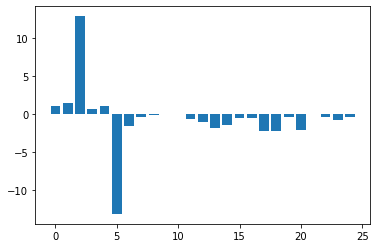

In [96]:
importance = clf.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pl.bar([x for x in range(len(importance))], importance)
pl.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.845


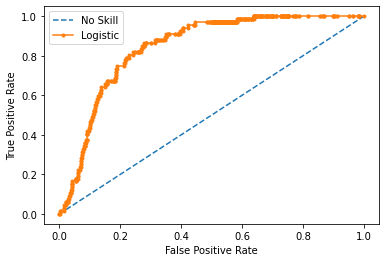

In [97]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = y_pred_probability[:,1]
# keep probabilities for the positive outcome only
#lr_probs = lr_probs[lr_probs>0]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pl.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pl.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
# show the legend
pl.legend()
# show the plot
pl.show()

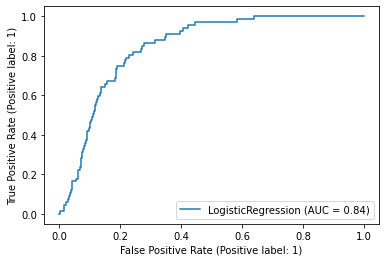

In [98]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier2,X_test,y_test)

#### Saving the model to use later

In [99]:
import pickle
filename = 'LR_trained_model.sav'
pickle.dump(classifier2, open(filename, 'wb'))

# Decision Tree Classifier

In [100]:
from sklearn.tree import DecisionTreeClassifier
clf_DT = DecisionTreeClassifier(random_state=0, class_weight = {1:100, 0:1}).fit(X_train, y_train)

In [101]:
y_pred_dt=clf_DT.predict(X_test)
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred_dt, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      0.99      1.00     23414
     class 1       0.03      0.07      0.04        67

    accuracy                           0.99     23481
   macro avg       0.51      0.53      0.52     23481
weighted avg       0.99      0.99      0.99     23481



In [102]:
from sklearn.model_selection import GridSearchCV
params={'max_leaf_nodes':list(range(2,100)),'min_samples_split':[2,3,4]}
dct = DecisionTreeClassifier(random_state = 5, class_weight = {1:100, 0:1})
classifier3=GridSearchCV(dct,params,verbose=1,cv=3, n_jobs=4)
classifier3.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight={0: 1, 1: 100},
                                              random_state=5),
             n_jobs=4,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [103]:
print("tuned hyperparameters :(best parameters) ",classifier3.best_estimator_)

tuned hyperparameters :(best parameters)  DecisionTreeClassifier(class_weight={0: 1, 1: 100}, max_leaf_nodes=99,
                       min_samples_split=3, random_state=5)


In [104]:
classifier3.best_params_

{'max_leaf_nodes': 99, 'min_samples_split': 3}

In [105]:
classifier4=DecisionTreeClassifier(max_leaf_nodes=classifier3.best_params_['max_leaf_nodes'],
                                   min_samples_split = classifier3.best_params_['min_samples_split'], 
                                   random_state=5, class_weight = {1:100, 0:1})
classifier4.fit(X_train, y_train)        

DecisionTreeClassifier(class_weight={0: 1, 1: 100}, max_leaf_nodes=99,
                       min_samples_split=3, random_state=5)

In [106]:
y_pred_dt2=classifier4.predict(X_test)
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred_dt2, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      0.76      0.86     23414
     class 1       0.01      0.90      0.02        67

    accuracy                           0.76     23481
   macro avg       0.51      0.83      0.44     23481
weighted avg       1.00      0.76      0.86     23481



##### Feature Importances

Feature: 0, Score: 22.5022
Feature: 1, Score: 2.9749
Feature: 2, Score: 8.7079
Feature: 3, Score: 2.7741
Feature: 4, Score: 8.5223
Feature: 5, Score: 5.5194
Feature: 6, Score: 12.3012
Feature: 7, Score: 3.2734
Feature: 8, Score: 0.9284
Feature: 9, Score: 1.0829
Feature: 10, Score: 0.7016
Feature: 11, Score: 1.6436
Feature: 12, Score: 3.4648
Feature: 13, Score: 2.9876
Feature: 14, Score: 2.0795
Feature: 15, Score: 0.4854
Feature: 16, Score: 1.8165
Feature: 17, Score: 4.6380
Feature: 18, Score: 4.8565
Feature: 19, Score: 0.4688
Feature: 20, Score: 4.1456
Feature: 21, Score: 1.9185
Feature: 22, Score: 0.9462
Feature: 23, Score: 0.2591
Feature: 24, Score: 1.0016


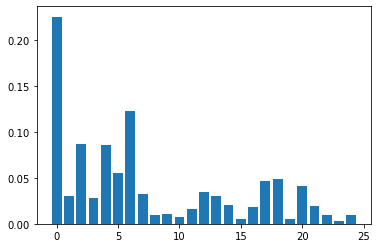

In [107]:
from matplotlib import pyplot
importance = clf_DT.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.4f' % (i,v*100))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [108]:
perm = PermutationImportance(classifier4).fit(X_test, y_test)
eli5.show_weights(perm)

In [109]:
fi = pd.DataFrame(data = perm.feature_importances_, index = X1.columns)

In [110]:
fi.sort_values(by = 0)

0
Year             -0.005869
Elapsed          -0.001738
AgeGroup_Old     -0.000988
AgeGroup_MidAge  -0.000256
Day              -0.000196
AgeGroup_Teenage -0.000068
Location_NE      -0.000034
Payment_Type_RPU -0.000034
Location_O        0.000017
Location_U        0.000860
Month             0.001576
Location_PP       0.001593
Dayofyear         0.004676
Area_O            0.009838
Area_N            0.010698
Area_NL           0.013492
Area_EC           0.014633
Area_Wlg          0.019343
Area_S            0.019352
Area_W            0.019616
Area_T            0.021362
Week              0.026089
Area_BP           0.028150
Area_C            0.039947
logapplied        0.042749

In [111]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred_dt2)
print(cm)
accuracy_score(y_test, y_pred_dt2)*100

[[17752  5662]
 [    7    60]]


75.85707593373365

In [112]:
from sklearn.metrics import plot_roc_curve

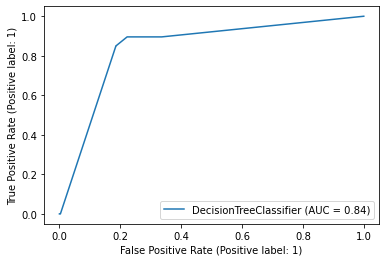

In [113]:
plot_roc_curve(classifier4, X_test, y_test)

In [114]:
import pickle
filename = 'Binary_Classifier_Training_Data.sav'
pickle.dump(classifier4, open(filename, 'wb'))

# Random Forest

In [115]:
X_train = pd.DataFrame(X_train, columns = X1.columns)

In [116]:
X_test = pd.DataFrame(X_test, columns =X1.columns)

In [117]:
'''
X_train.drop(["Received","Applied","logreceived","logapplied","Location_NE",
              "AgeGroup_Old","Age_30-34","Age_65+","Location_PP","Ratio",
              "AgeGroup_MidAge","Is_month_start","Location_O","Age_40-44",
              "Age_55-59","Is_year_end","Is_year_start","Payment_Method_U"], axis = 1, inplace = True)
'''

'\nX_train.drop(["Received","Applied","logreceived","logapplied","Location_NE",\n              "AgeGroup_Old","Age_30-34","Age_65+","Location_PP","Ratio",\n              "AgeGroup_MidAge","Is_month_start","Location_O","Age_40-44",\n              "Age_55-59","Is_year_end","Is_year_start","Payment_Method_U"], axis = 1, inplace = True)\n'

In [118]:
'''
X_test.drop(["Received","Applied","logreceived","logapplied","Location_NE",
              "AgeGroup_Old","Age_30-34","Age_65+","Location_PP","Ratio",
              "AgeGroup_MidAge","Is_month_start","Location_O","Age_40-44",
              "Age_55-59","Is_year_end","Is_year_start","Payment_Method_U"], axis = 1, inplace = True)
'''

'\nX_test.drop(["Received","Applied","logreceived","logapplied","Location_NE",\n              "AgeGroup_Old","Age_30-34","Age_65+","Location_PP","Ratio",\n              "AgeGroup_MidAge","Is_month_start","Location_O","Age_40-44",\n              "Age_55-59","Is_year_end","Is_year_start","Payment_Method_U"], axis = 1, inplace = True)\n'

In [119]:
from sklearn.ensemble import RandomForestClassifier
clf_RFT = RandomForestClassifier(class_weight = {1 : 100, 0:1})
clf_RFT.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 100})

In [120]:
y_pred_rft=clf_RFT.predict(X_test)
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred_rft, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     23414
     class 1       0.02      0.01      0.02        67

    accuracy                           1.00     23481
   macro avg       0.51      0.51      0.51     23481
weighted avg       0.99      1.00      0.99     23481



In [121]:
from sklearn.model_selection import GridSearchCV
params={'max_leaf_nodes':list(range(80,100,2)),'min_samples_split':[2,3,4]}
rdc = RandomForestClassifier(random_state = 5, class_weight = {1 : 100, 0:1})
classifier5=GridSearchCV(rdc,params,verbose=1,cv=3, n_jobs = 4)
classifier5.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight={0: 1, 1: 100},
                                              random_state=5),
             n_jobs=4,
             param_grid={'max_leaf_nodes': [80, 82, 84, 86, 88, 90, 92, 94, 96,
                                            98],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [122]:
print("tuned hyperparameters :(best parameters) ",classifier5.best_params_)

tuned hyperparameters :(best parameters)  {'max_leaf_nodes': 98, 'min_samples_split': 4}


In [123]:
classifier6=RandomForestClassifier(max_leaf_nodes=98, min_samples_split = 3, random_state=5, class_weight = {1 : 100, 0:1})
classifier6.fit(X_train, y_train)  

RandomForestClassifier(class_weight={0: 1, 1: 100}, max_leaf_nodes=98,
                       min_samples_split=3, random_state=5)

In [124]:
y_pred_rft=classifier6.predict(X_test)
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred_rft, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      0.75      0.86     23414
     class 1       0.01      0.91      0.02        67

    accuracy                           0.75     23481
   macro avg       0.50      0.83      0.44     23481
weighted avg       1.00      0.75      0.85     23481



In [125]:
y_pred_prob = classifier6.predict_proba(X_test)

In [126]:
y_pred_40_pct_threshold = y_pred_prob[:,1] > 0.8

In [127]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred_40_pct_threshold, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      0.84      0.91     23414
     class 1       0.01      0.79      0.03        67

    accuracy                           0.84     23481
   macro avg       0.51      0.81      0.47     23481
weighted avg       1.00      0.84      0.91     23481



In [128]:
perm = PermutationImportance(classifier6).fit(X_test, y_test)
eli5.show_weights(perm)

In [129]:
fi = pd.DataFrame(data = perm.feature_importances_, index = X_train.columns)

In [130]:
fi.sort_values(by = 0)

0
Elapsed          -0.014573
Location_NE      -0.004191
Month            -0.002922
Year             -0.002095
AgeGroup_Old     -0.001899
Week             -0.000852
AgeGroup_MidAge  -0.000622
Day               0.000060
AgeGroup_Teenage  0.000077
Location_O        0.000213
Location_U        0.000698
Dayofyear         0.000724
Payment_Type_RPU  0.001014
Location_PP       0.001933
Area_O            0.007870
Area_N            0.008875
Area_W            0.012393
Area_NL           0.013943
Area_EC           0.014309
Area_Wlg          0.016924
Area_S            0.017265
Area_T            0.019905
Area_BP           0.024905
Area_C            0.036975
logapplied        0.037877

Feature: 0, Score: 0.24491
Feature: 1, Score: 0.04090
Feature: 2, Score: 0.04840
Feature: 3, Score: 0.04182
Feature: 4, Score: 0.06854
Feature: 5, Score: 0.03436
Feature: 6, Score: 0.07714
Feature: 7, Score: 0.02697
Feature: 8, Score: 0.00770
Feature: 9, Score: 0.00606
Feature: 10, Score: 0.00363
Feature: 11, Score: 0.02240
Feature: 12, Score: 0.05357
Feature: 13, Score: 0.03783
Feature: 14, Score: 0.02365
Feature: 15, Score: 0.00874
Feature: 16, Score: 0.01368
Feature: 17, Score: 0.05861
Feature: 18, Score: 0.06417
Feature: 19, Score: 0.01670
Feature: 20, Score: 0.05053
Feature: 21, Score: 0.01279
Feature: 22, Score: 0.01581
Feature: 23, Score: 0.00275
Feature: 24, Score: 0.01836


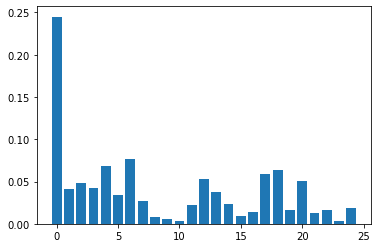

In [131]:
from matplotlib import pyplot
importance = classifier6.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [132]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred_rft)
print(cm)
accuracy_score(y_test, y_pred_rft)*100

[[17496  5918]
 [    6    61]]


74.77109152080405

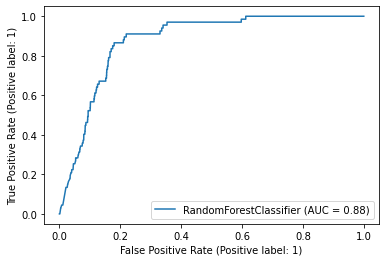

In [133]:
plot_roc_curve(classifier6, X_test, y_test)

In [134]:
import pickle
filename = 'Random_Forest_Classifier_Training_Data.sav'
pickle.dump(classifier6, open(filename, 'wb'))

## Voting Classifier

In [135]:
from sklearn.ensemble import VotingClassifier

##### Hard Voting

In [136]:
estimator=[]
estimator.append(('LR',classifier2))
estimator.append(('DTC',classifier4))
estimator.append(('RFC',classifier6))
vch = VotingClassifier(estimators=estimator, voting='hard')

In [137]:
vch.fit(X_train, y_train.values)

VotingClassifier(estimators=[('LR',
                              LogisticRegression(C=1,
                                                 class_weight={0: 1, 1: 10},
                                                 max_iter=2000,
                                                 random_state=5)),
                             ('DTC',
                              DecisionTreeClassifier(class_weight={0: 1,
                                                                   1: 100},
                                                     max_leaf_nodes=99,
                                                     min_samples_split=3,
                                                     random_state=5)),
                             ('RFC',
                              RandomForestClassifier(class_weight={0: 1,
                                                                   1: 100},
                                                     max_leaf_nodes=98,
                                         

In [138]:
y_pred_vote = vch.predict(X_test)

In [139]:
print(classification_report(y_test, y_pred_vote))

              precision    recall  f1-score   support

           0       1.00      0.73      0.85     23414
           1       0.01      0.91      0.02        67

    accuracy                           0.74     23481
   macro avg       0.50      0.82      0.43     23481
weighted avg       1.00      0.74      0.84     23481



##### Soft Voting

In [140]:
estimator=[]
estimator.append(('LR',classifier2))
estimator.append(('DTC',classifier4))
estimator.append(('RFC',classifier6))
vcs = VotingClassifier(estimators=estimator, voting='soft')

In [141]:
vcs.fit(X_train, y_train.values)

VotingClassifier(estimators=[('LR',
                              LogisticRegression(C=1,
                                                 class_weight={0: 1, 1: 10},
                                                 max_iter=2000,
                                                 random_state=5)),
                             ('DTC',
                              DecisionTreeClassifier(class_weight={0: 1,
                                                                   1: 100},
                                                     max_leaf_nodes=99,
                                                     min_samples_split=3,
                                                     random_state=5)),
                             ('RFC',
                              RandomForestClassifier(class_weight={0: 1,
                                                                   1: 100},
                                                     max_leaf_nodes=98,
                                         

In [142]:
y_pred_vote2 = vcs.predict(X_test)

In [143]:
print(classification_report(y_test, y_pred_vote2))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86     23414
           1       0.01      0.90      0.02        67

    accuracy                           0.75     23481
   macro avg       0.50      0.82      0.44     23481
weighted avg       1.00      0.75      0.85     23481



Either of the hard voting or soft voting can be saved as the diiference is not noticible. We are saving soft voting as recall and accuracy is slightly better than hard voting.

In [145]:
import pickle
filename = 'Voting_Classifier_Training_Data.sav'
pickle.dump(vcs, open(filename, 'wb'))

# The End.